In [ ]:
import tensorflow as tf
tf.enable_eager_execution()

### Example 01

In [2]:
import tensorflow as tf

a = tf.Variable(tf.constant(4.))

loss = []
a_a = []

x_data= tf.constant(5.)

optimizer = tf.keras.optimizers.SGD(0.01)

for i in range(10):
    with tf.GradientTape() as t:
        multiplication = tf.multiply(a, x_data)
        curr_loss = tf.square(tf.subtract(multiplication,50))
        a_a.append(a.numpy())
    grads = t.gradient(curr_loss, [a])
    
    optimizer.apply_gradients(zip(grads,[a]))
    
    loss.append(curr_loss.numpy())
    
import pandas as pd

pd.DataFrame(data = {"Loss":loss,"a":a_a})

,Loss,a
0,900.000000,4.000000
1,225.000000,7.000000
2,56.250000,8.500000
3,14.062500,9.250000
4,3.515625,9.625000
5,0.878906,9.812500
6,0.219727,9.906250
7,0.054932,9.953125
8,0.013733,9.976562
9,0.003433,9.988281


### Example 02

In [3]:
a = tf.Variable(tf.constant(1.))
b = tf.Variable(tf.constant(1.))

x_data = tf.constant(5.)

optimizer = tf.keras.optimizers.SGD(0.01)

loss = []
a_a =[]
b_b = []

for i in range(10):
    with tf.GradientTape() as t:
        # Function : (a * x_data) + b
        two_gate = tf.add(tf.multiply(a,x_data),b)
        # Define loss
        curr_loss = tf.square(tf.subtract(two_gate,50))
        
        a_a.append(a.numpy())
        b_b.append(b.numpy())
        
    grads = t.gradient(curr_loss, [a,b])
    optimizer.apply_gradients(zip(grads,[a,b]))
    
    loss.append(curr_loss.numpy())
    
import pandas as pd

pd.DataFrame(data = {'Loss': loss,'a':a_a,'b':b_b})

,Loss,a,b
0,1936.000000,1.000000,1.000000
1,446.054443,5.400000,1.880000
2,102.770935,7.512000,2.302400
3,23.678413,8.525760,2.505152
4,5.455517,9.012364,2.602473
5,1.256954,9.245934,2.649187
6,0.289602,9.358048,2.671610
7,0.066723,9.411863,2.682373
8,0.015373,9.437695,2.687539
9,0.003542,9.450093,2.690019


x_data.shape = (500, 1)


Text(0, 0.5, 'Loss')

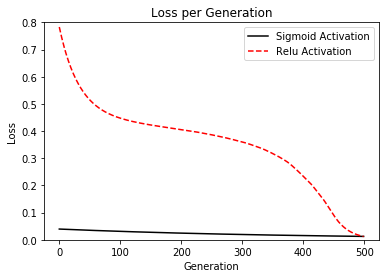

In [5]:
# Activation Functions

import tensorflow as tf
import numpy as np

tf.random.set_seed(5)

a1 = tf.Variable(tf.random.normal(shape=[1,1]))
b1 = tf.Variable(tf.random.normal(shape=[1,1]))

a2 = tf.Variable(tf.random.normal(shape=[1,1]))
b2 = tf.Variable(tf.random.normal(shape=[1,1]))

x_data = tf.constant(tf.random.normal(shape=[500,]))

x_data = tf.expand_dims(x_data,1)

print("x_data.shape = {0}".format(x_data.shape))

loss_sigmoid = []
loss_relu = []

epochs = []

optimizer_sigmoid = tf.optimizers.SGD(0.01)
optimizer_relu = tf.optimizers.SGD(0.01)

for i in range(500):
    with tf.GradientTape() as t_sigmoid:
        sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data,a1),b1))
        relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))
        
        # Declare the loss function as the difference between
        # the output and a target value, 0.75.
        curr_loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
        
    grads_sigmoid = t_sigmoid.gradient(curr_loss1, [a1,b1])
    optimizer_sigmoid.apply_gradients(zip(grads_sigmoid,[a1,b1]))
    
    with tf.GradientTape() as t_relu:
        sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data,a1),b1))
        relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))
        
        # Declare the loss function as the difference between
        # the output and a target value, 0.75.
        curr_loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))  
    
    grads_relu = t_relu.gradient(curr_loss2, [a2,b2])
    optimizer_relu.apply_gradients(zip(grads_relu,[a2,b2]))
    
    loss_sigmoid.append(curr_loss1.numpy())
    loss_relu.append(curr_loss2.numpy())
    
    epochs.append(i)


import matplotlib.pyplot as plt

plt.plot(loss_sigmoid,'k-',label='Sigmoid Activation')
plt.plot(loss_relu,'r--',label='Relu Activation')
plt.ylim(0,0.8)
plt.legend(loc='upper right')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')

### Example 03: Implemeting one-Layer Neural network

In [6]:
# Implemeting one-Layer Neural network

from sklearn.datasets import load_iris
iris = load_iris()

x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

print(x_vals.shape) # 3 Inputs
print(y_vals.shape)

(150, 3)
(150,)


,Traning Epochs,Loss
0,0,3.584332
1,1,2.074656
2,2,1.329543
3,3,0.953710
4,4,0.752080
...,...,...
95,95,0.497563
96,96,0.497436
97,97,0.497310
98,98,0.497184


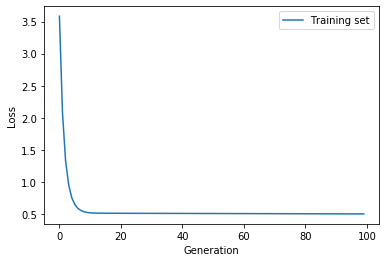

In [7]:
# make results reproducible
tf.random.set_seed(2)

# Split the data into train and test of 80 and 20 percentahe respectively
from sklearn.model_selection import train_test_split

x_vals_train,x_vals_test,y_vals_train,y_vals_test = train_test_split(x_vals,y_vals,test_size=0.2,random_state=42)

# Normalize by column (min-max norm)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

x_vals_train = tf.cast(tf.constant(x_vals_train),tf.float32)
y_vals_train = tf.cast(tf.constant(y_vals_train),tf.float32)

y_vals_train = tf.expand_dims(y_vals_train,1)

# Declare batch size
batch_size = 50

# Create variables for both NN layers
hidden_layer_nodes = 10

# Layer 1 : Total input = 3 and hidden nodes = 10 so shape of Weights = [3,10] and bias = [10]
# Layer 2 : Total input =10 and hidden nodes=1 so the shape of weights = [10,1] and bias = [1]

A1 = tf.Variable(tf.random.normal(shape=[3,10]))
b1 = tf.Variable(tf.random.normal(shape=[10]))

A2 = tf.Variable(tf.random.normal(shape=[10,1]))
b2 = tf.Variable(tf.random.normal(shape=[1]))

loss = []
epochs = []

optimizer = tf.optimizers.SGD(0.01)

for i in range(100):
    with tf.GradientTape() as t:
        # Declare output]
        hidden_output = tf.nn.relu(tf.add(tf.matmul(x_vals_train,A1),b1))
        final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))
        
        # Declare loss function (MSE)
        curr_loss = tf.reduce_mean(tf.square(y_vals_train - final_output))
        
    grads = t.gradient(curr_loss,[A2,b2])
    optimizer.apply_gradients(zip(grads,[A2,b2]))
    
    loss.append(curr_loss.numpy())
    epochs.append(i)
    
import matplotlib.pyplot as plt
plt.plot(epochs,loss,label = "Training set")
plt.xlabel("Generation")
plt.ylabel("Loss")
plt.legend(loc="upper right")

import pandas as pd

pd.DataFrame(data = {'Traning Epochs': epochs,'Loss':loss})